In [162]:
#install.packages('rpart')

In [14]:
library('rpart')
library('caret')

In [15]:
# install.packages("rpart.plot")

In [16]:
library(rpart.plot)

In [17]:
data = read.csv('../../AnnotateData/recgli_annot10_CELorNELorUNK.csv')

In [18]:
data = data[data['outcome'] == "txe" | data['outcome']=="rHGG", ]
dim(data)

[1] 305  75

In [19]:
data = data[data['CELorNEL'] == "CEL" | data['CELorNEL'] == "NEL",]

In [20]:
dim(data)

[1] 292  75

In [21]:
features = c('t_number_y',"nfa.1", 'nadc.1', 'cbvn_nlin', 'recov_npar', 'ncho', 'ncre', 'nnaa', 'cni', 'ccri', 'CELorNEL', 'newdata', 'outcome')

In [22]:
data = data[, features]

In [23]:
data = droplevels.data.frame(data)

In [24]:
colSums(is.na(data))

t_number_y      nfa.1     nadc.1  cbvn_nlin recov_npar       ncho       ncre 
         0         15         15         97         97        136        136 
      nnaa        cni       ccri   CELorNEL    newdata    outcome 
       136        136        136          0          0          0

In [25]:
data_dummyVars = data.frame(data, 
                           hasPerf = ifelse(is.na(data$cbvn_nlin), 0, 1), 
                           hasSpec = ifelse(is.na(data$cni), 0, 1), 
                           hasDiffu = ifelse(is.na(data$nadc.1), 0, 1))

In [26]:
data_imp = data_dummyVars

In [13]:
data_dummyVars$cbvn_nlin = ifelse(is.na(data$cbvn_nlin), 999, data$cbvn_nlin)
data_dummyVars$nadc.1 = ifelse(is.na(data$nadc.1), 999, data$nadc.1)
data_dummyVars$nfa.1 = ifelse(is.na(data$nadc.1), 999, data$nfa.1)
data_dummyVars$recov_npar = ifelse(is.na(data$recov_npar), 999, data$recov_npar)
data_dummyVars$cni = ifelse(is.na(data$cni), 999, data$cni)
data_dummyVars$ncho = ifelse(is.na(data$ncho), 999, data$ncho)
data_dummyVars$ncre = ifelse(is.na(data$ncre), 999, data$ncre)
data_dummyVars$nnaa = ifelse(is.na(data$nnaa), 999, data$nnaa)
data_dummyVars$ccri = ifelse(is.na(data$ccri), 999, data$ccri)



In [27]:
data_imp = data_dummyVars 

In [28]:
head(data_dummyVars)

,t_number_y,nfa.1,nadc.1,cbvn_nlin,recov_npar,ncho,ncre,nnaa,cni,ccri,CELorNEL,newdata,outcome,hasPerf,hasSpec,hasDiffu
1,10366,0.83,0.75,1.08,98.89,1.03,0.47,0.46,2.60,1.88,NEL,1,txe,1,1,1
3,10448,0.50,1.62,2.43,100.00,NA,NA,NA,NA,NA,CEL,1,rHGG,1,0,1
5,10594,0.42,2.12,0.95,100.00,1.04,0.79,0.36,3.27,1.03,NEL,1,rHGG,1,1,1
6,10594,0.73,1.60,0.84,100.00,1.61,1.07,0.13,7.57,2.33,NEL,1,rHGG,1,1,1
7,10594,0.42,3.03,0.42,100.00,1.89,1.21,0.74,4.37,2.13,NEL,1,rHGG,1,1,1
8,10655,0.61,1.15,0.63,100.00,1.10,0.53,0.27,3.43,2.22,NEL,1,txe,1,1,1


In [30]:
data_cel = data_dummyVars[which(data_dummyVars$CELorNEL == "CEL"),]

In [31]:
data_cel_stat = data_cel[!is.na(data_cel$cni),]

In [178]:
table(data_imp$outcome)['txe']/sum(table(data_imp$outcome)['txe'], table(data_imp$outcome)['rHGG'])

txe 
0.2671233

In [179]:
## split into train/test by tnum 
unique_tnums = unique(data_imp$t_number_y)
set.seed(1)
train_tnums = unique_tnums[sample(c(1:length(unique_tnums)), size = round(length(unique_tnums)*.75))]
test_tnums = unique_tnums[! unique_tnums %in% train_tnums]
## split data by patient split above: 
data_train = data_imp[data_imp$t_number_y %in% train_tnums, ]
data_test = data_imp[data_imp$t_number_y %in% test_tnums, ]


In [180]:
unique_tnums = unique(data_imp$t_number_y)
unique_tnums

[1] 10366 10448 10594 10655 10708 10709 10748 10756 10790 10793 11025 11192
 [13] 11323 11333 11358 11382 11406 11410 11412 11476 11482 11484  5296  5317
 [25]  5333  5361  5365  5535  5550  5603  5610  5656  5668  5680  5681  5728
 [37]  5730  5766  5788  5819  5880  5882  5944  5950  5961  5980  6020  6069
 [49]  6128  6144  6152  6206  6218  6241  6243  6260  6274  6285  6295  6296
 [61]  6313  6369  6386  6415  6472  6495  6522  6551  6604  6619  6630  6682
 [73]  6707  6771  6870  6929  7016  7028  7039  7329  7394  7417  7451  7484
 [85]  7527  7540  7555  7556  7741  7759  8070  8773  8775  8783  8869  8878
 [97]  8943  8944  8960  8977  8995  9000  9014  9063  9084  9085  9119  9127
[109]  9213  9288  9406  9408  9410  9586  9683  9970  9971 10251 11506 10386
[121] 10343 10240 10242 10152  8956 10218 10699  9134 10202 11165  9259 10160
[133] 10777 11318 11390 10768 10763 10269

In [181]:
set.seed(2)

In [182]:
outcome = "outcome"
features = c('CELorNEL', 'newdata', 'cbvn_nlin', 'recov_npar',
             'ccri', 'cni', 'ncho', 'ncre', 'nnaa', 'nfa.1', 'nadc.1',
             'hasPerf', 'hasSpec', 'hasDiffu')
features.addsign <- paste(features, collapse = "+")
rf_formula = as.formula(paste(outcome, features.addsign, sep = "~"))

In [183]:
fulltree = rpart(rf_formula, data=data_train, method = "class")

In [32]:
cnitree = rpart(outcome~cni, data = data_cel_stat, method = "class", )

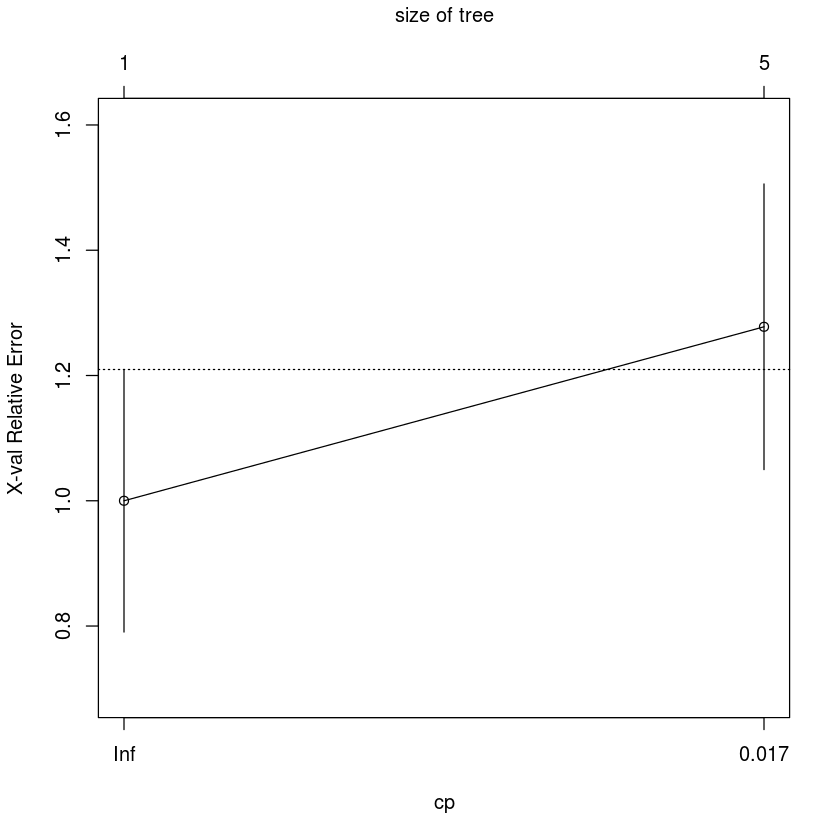

In [33]:
plotcp(cnitree)

In [185]:
printcp(fulltree)


Classification tree:
rpart(formula = rf_formula, data = data_train, method = "class")

Variables actually used in tree construction:
[1] cbvn_nlin ccri      nadc.1    newdata   nfa.1    

Root node error: 66/235 = 0.28085

n= 235 

        CP nsplit rel error xerror    xstd
1 0.060606      0   1.00000 1.0000 0.10438
2 0.030303      2   0.87879 1.1970 0.10972
3 0.015152      5   0.78788 1.2121 0.11006
4 0.010000      9   0.72727 1.2424 0.11071


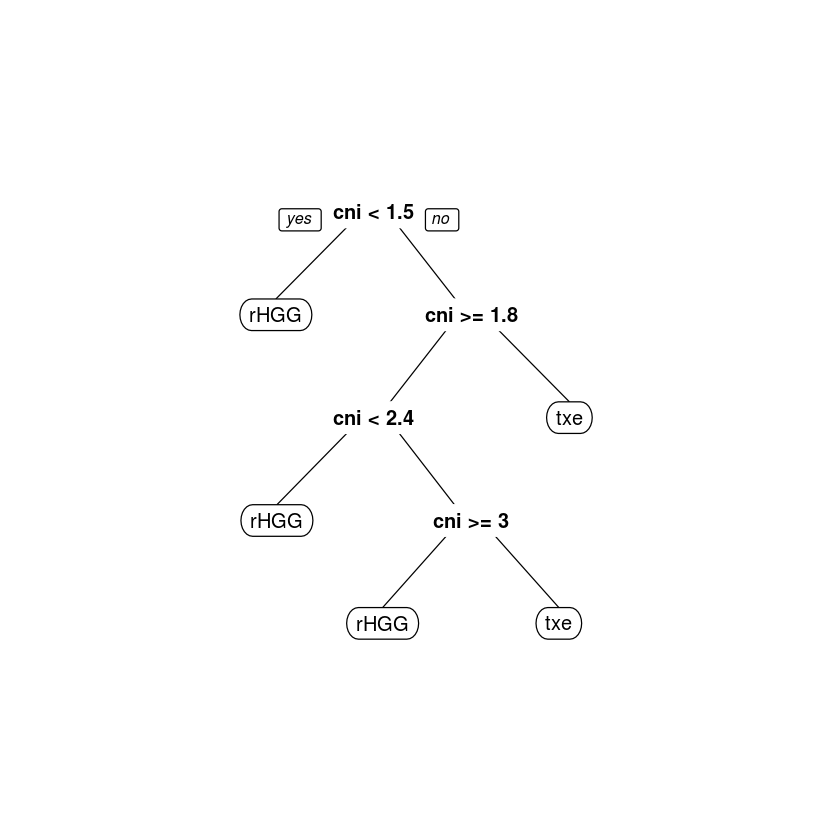

In [34]:
prp(cnitree)

In [187]:
tree.pred = predict(fulltree, newdata=data_test)

In [188]:
tree.pred = as.data.frame(tree.pred)

In [189]:
preds = ifelse(tree.pred['rHGG'] > 0.5, "rHGG", 'txe')

In [197]:
preds = as.factor(preds)

In [202]:
confusionMatrix(preds, data_test$outcome)

Confusion Matrix and Statistics

          Reference
Prediction rHGG txe
      rHGG   31   9
      txe    14   3
                                          
               Accuracy : 0.5965          
                 95% CI : (0.4582, 0.7244)
    No Information Rate : 0.7895          
    P-Value [Acc > NIR] : 0.9997          
                                          
                  Kappa : -0.053          
 Mcnemar's Test P-Value : 0.4042          
                                          
            Sensitivity : 0.6889          
            Specificity : 0.2500          
         Pos Pred Value : 0.7750          
         Neg Pred Value : 0.1765          
             Prevalence : 0.7895          
         Detection Rate : 0.5439          
   Detection Prevalence : 0.7018          
      Balanced Accuracy : 0.4694          
                                          
       'Positive' Class : rHGG            
                                          

In [198]:
table(preds)

preds
rHGG  txe 
  40   17 

In [201]:
table(data_test$outcome)


rHGG  txe 
  45   12 

In [200]:
str(data_test['outcome'])

'data.frame':	57 obs. of  1 variable:
 $ outcome: Factor w/ 2 levels "rHGG","txe": 2 2 2 1 1 1 1 1 1 1 ...
